In [1]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join('archive', 'creditcard.csv'))

archive/creditcard.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-crad-fraud-detection/creditcard.csv")
print(df.shape)
print(df.columns)
print(df.head())
print(df.info())


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.16717

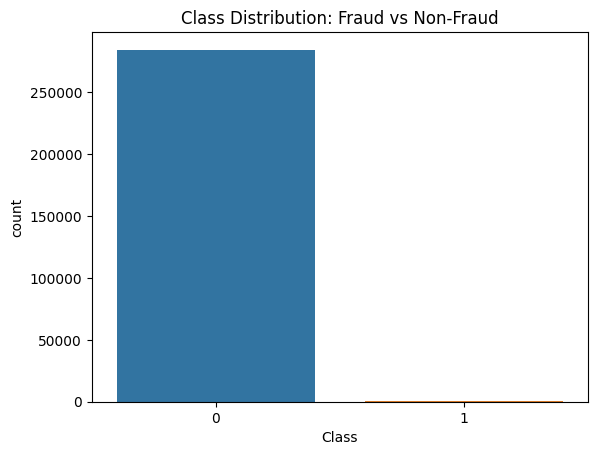

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Class'])
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()

print(df['Class'].value_counts(normalize=True) * 100)

In [4]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Class'])  
y = df['Class']  

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(y_resampled.value_counts(normalize=True) * 100)

Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class balance
print(y_resampled.value_counts(normalize=True) * 100)

Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled[['Amount', 'Time']] = scaler.fit_transform(X_resampled[['Amount', 'Time']])
print(X_resampled.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.824930 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.824930  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.824910 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.824910 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.824889 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Training Set Size:', X_train.shape)
print('Test Set Size:', X_test.shape)

Training Set Size: (454904, 30)
Test Set Size: (113726, 30)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', accuracy_score(y_test, y_pred))


Accuracy: 0.9809981886288096

Confusion Matrix:
 [[56255   495]
 [ 1666 55310]]

Classification Report:
 0.9809981886288096


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Random Fotresr Accuracy:', accuracy_score(y_test, y_pred_rf))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report:\n', accuracy_score(y_test, y_pred_rf))

Random Fotresr Accuracy: 0.999903276295658

Confusion Matrix:
 [[56739    11]
 [    0 56976]]

Classification Report:
 0.999903276295658


In [10]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy  =rf_model.score(X_test, y_test)

print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.999903276295658


In [11]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('Updated Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report:\n', accuracy_score(y_test, y_pred_rf))


Updated Random Forest Accuracy: 0.9918224504510842

Confusion Matrix:
 [[56677    73]
 [  857 56119]]

Classification Report:
 0.9918224504510842


In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print('\nClassification Report:\n', accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9990943144047975

Confusion Matrix:
 [[56682    68]
 [   35 56941]]

Classification Report:
 0.9990943144047975


In [14]:
import joblib

joblib.dump(xgb_model, 'xgboost_fraud_model.pkl')

print("Xgboost Model Saved as xgboost_fraud_model.pkl'")

Xgboost Model Saved as xgboost_fraud_model.pkl'


In [15]:
os.listdir("/kaggle/working/")

['.virtual_documents', 'xgboost_fraud_model.pkl']

In [16]:
import shutil

shutil.move("xgboost_fraud_model.pkl", "/kaggle/working/xgboost_fraud_model.pkl")
print("✅ Model moved successfully!")

✅ Model moved successfully!
